# Keys to reduce traffic-Analyzing traffic indicators on Intertate 94.

The goal for this project is to determine indicators that generate traffic on I-94 such as weather, time of the week, season, etc. and help us to decide actions to get better the traffic.

This project consists in analyze the [Interstate 94](https://en.wikipedia.org/wiki/Interstate_94) Traffic Volume Data. I-94 is a Highway connecting the Great Lakes and northern Great Plains regions of the United States.

- Mencionar los resultados


The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)


In [1]:
#Read the Data Frame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Inter=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
#Get some basic info.
Inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
Inter.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Traffic Volume

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


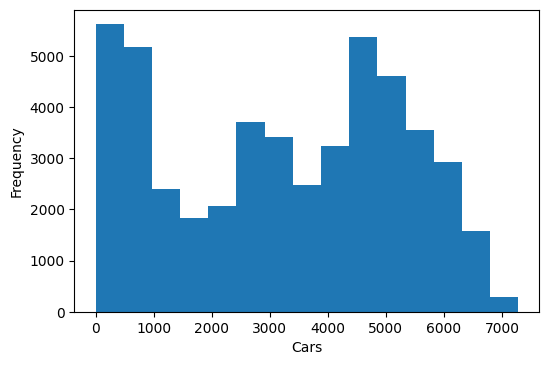

In [3]:
#When working with Jupyter, is needed this to show the tables.
%matplotlib inline

Inter['traffic_volume'].plot.hist(bins=15)
plt.xlabel('Cars')
print(Inter['traffic_volume'].describe())

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00 25% of the time 1193 cars passed as much per hour. 

A range of cars from `0 to less than 1000` is passing very very frequently. This may be for cars driving at night.

75% of the time cars are at most 4933. In the graph can be seen other peack around `4000` and `5000` cars that happens very very frequently too. This may be for hours when people go to work.

The maximun amount of cars that passed the highway was 7280.

There are two ranges where cars drive through the I-94 the most. This could imply that the time has something to do with this.

## Day vs Night traffic

We will divide the dataset in two:

- Daytime: from 7 a.m. to 7 p.m
- Night tiem: from 7 p.m. to 7 a.m

In [4]:
Inter['date_time']=pd.to_datetime(Inter['date_time'])
Inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [5]:
#Change categorical type to date type
Inter['hour']=Inter['date_time'].dt.hour
Inter.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


In [6]:
#Day Dataset
Inter_day=Inter[(Inter['hour']>=7)&(Inter['hour']<19)]

In [7]:
#Night Dataset
Inter_night=Inter[(Inter['hour']<7)]
Inter_night_2=Inter[Inter['hour']>=19]
Inter_night=pd.concat([Inter_night,Inter_night_2])

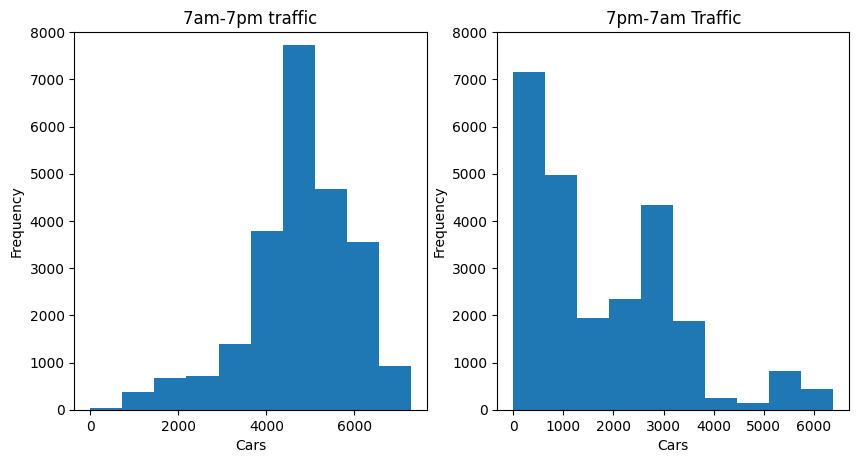

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
Inter_day['traffic_volume'].plot.hist()
plt.title('7am-7pm traffic')
plt.xlabel('Cars')
plt.ylim([0,8000])
plt.subplot(1,2,2)
Inter_night['traffic_volume'].plot.hist()
plt.title('7pm-7am Traffic')
plt.xlabel('Cars')
plt.ylim([0,8000])
plt.show()

In [9]:
print(Inter_day['traffic_volume'].describe())
print(Inter_night['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


The shape of the graphs show some similarity. The `7pm-7am Traffic` Graph show a clearly a positiv skewed distribution, while the `7am-7pm Traffic` grapgh shows a combination between a normal and skewed distribution.

The amount of cars at night is very low. It may has some hours where the amount of cars is very high, but does not happen very often. By the other side, the day plot show that in the first 25% of the time the highway already reaches `4252` cars at most.

If we are looking for indicators of heavy traffic, it should be okey to forget the nigh time data.

## Time analysis

In [10]:
#Create a new column with the month
Inter_day['month']=Inter_day['date_time'].dt.month
Inter.head()

<ipython-input-10-9909950c14c4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


In [11]:
by_month=Inter_day.groupby('month').mean()
by_month
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

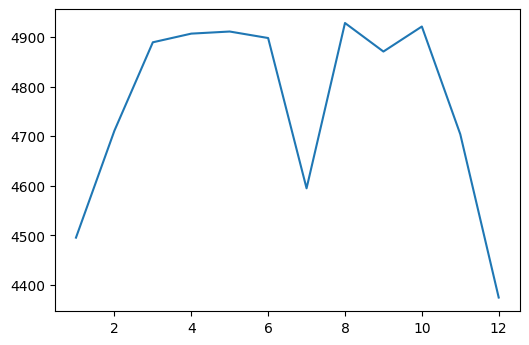

In [12]:
plt.plot(by_month['traffic_volume'])

Traffic looks less on cold months and heavier in hot months, but there is an exception that is July.

Now lets analyze the day.

In [13]:
#Create another column called `day_week` to sort the days
Inter_day['day_week']=Inter_day['date_time'].dt.dayofweek
#group the DataSet for days and sort it in `by_day`
by_day=Inter_day.groupby('day_week').mean()
#0 is Monday, 6 is Sunday
by_day['traffic_volume']

<ipython-input-13-01992fb9170f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



day_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

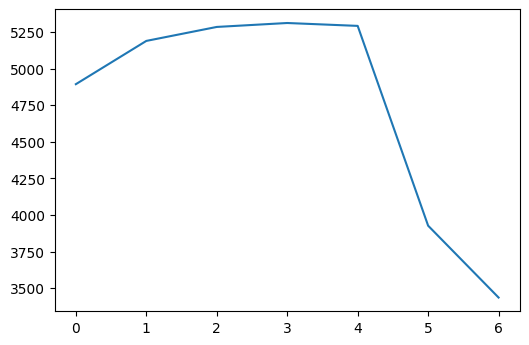

In [14]:
plt.plot(by_day['traffic_volume'])

Heavy traffic is common on workdays-Monday to Friday. Every workday is above 5000 (mean) except for monday. 

Traffic is lighter on weekend with an average lower than 4000 per day

Now lets see how the traffic beheaves for the time of the day.
For this we eill separate the Dataset in workdays and weekends, if not, the weekends will drag down the average of the traffic for each hour. So lets separate the Dataset first.

In [15]:
#Create a new column called `hour` that sort the hours
Inter_day['hour']=Inter_day['date_time'].dt.hour

#Separate in workdays the entries from monday to friday
workdays=Inter_day.copy()[Inter_day['day_week']<=4]#4==Friday

#Separate in weekend the days of Saturday and Sunday
weekend=Inter_day.copy()[Inter_day['day_week']>=5]#5==Saturday

#Group by hours and save it in by_hour_work
by_hour_work=workdays.groupby('hour').mean()

#Group by hours and sort in by_hour_end
by_hour_end=weekend.groupby('hour').mean()

#See the average of the traffic volume by hour for both datasets
print(by_hour_work['traffic_volume'])
print(by_hour_end['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-15-f162e2b329bb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



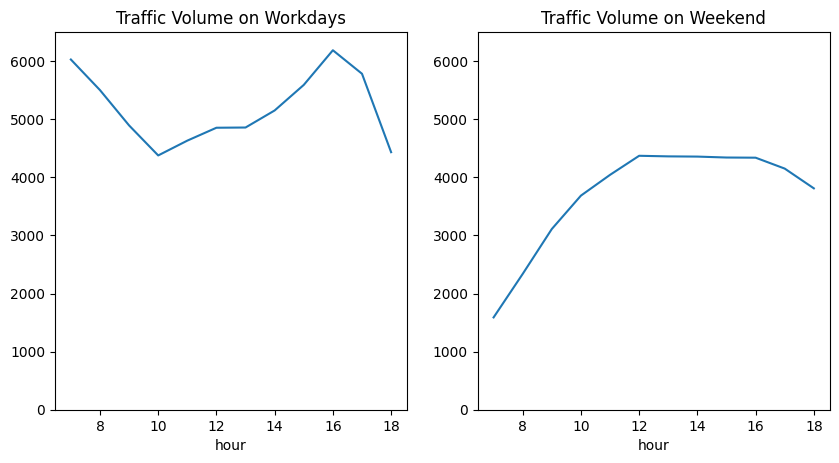

In [16]:
dict_hour={'Workdays':by_hour_work,'Weekend':by_hour_end}
plt.figure(figsize=(10,5))
for day,i in zip(dict_hour,range(1,3)):
    plt.subplot(1,2,i)
    data=dict_hour[day]
    data['traffic_volume'].plot.line()
    plt.title('Traffic Volume on {}'.format(day))
    plt.ylim([0,6500])

The traffic volume on Workdays at the daytime is higher than on weekends, having a minimun at daytime of 4,500, while on weekends it reaches barely 4,500. The rush hours for workdays ar 7 am and 4pm.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier on warm months.
- The traffic is heavier on workdays.
- On workdays the ruch hours are 7am and 4pm.


## Weather indicators
Now that we have finished the time indicators is time to look for another direction...The weather, the dataset give us some columns with weather information.

These columns are in numeric type, so lets see the correlation they have with the `traffic volume`.

In [17]:
#Drop the unnecesry columns
Inter_weather=Inter_day.drop(['holiday','date_time','hour','month','day_week'],axis=1)

#Calculate the correlation between the columns and the traffic
Inter_weather.corr()['traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

The weather column with stronger correlation is `temp`, lets graph this correlation.

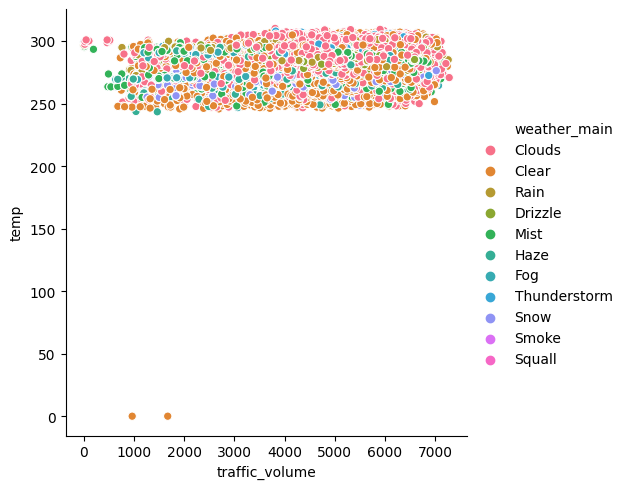

In [18]:
# plt.scatter(Inter['traffic_volume'],Inter['temp'])
scatter=sns.relplot(data=Inter_day,x='traffic_volume',y='temp',hue='weather_main')


Lookin at this, no numeric weather column is a heavy traffic indicator. Lets see if woth the categorical weather columns give us something.

## Weather indicators-categorical columns
The columns are: `wather_mean` and `weather_description`.

In [24]:
#Group the Data for `weather_main` column
by_weather_main=Inter_day.groupby('weather_main').mean()

#Group the Data for `weather description` column
by_weather_description=Inter_day.groupby('weather_description').mean()

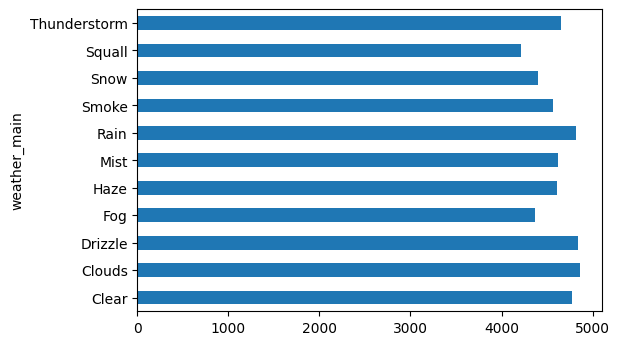

In [25]:
#plot the `weather_main` 
by_weather_main['traffic_volume'].plot.barh()

Looks like there is no main weather type where traffic is above 5000. Lets group by `Weather_description`

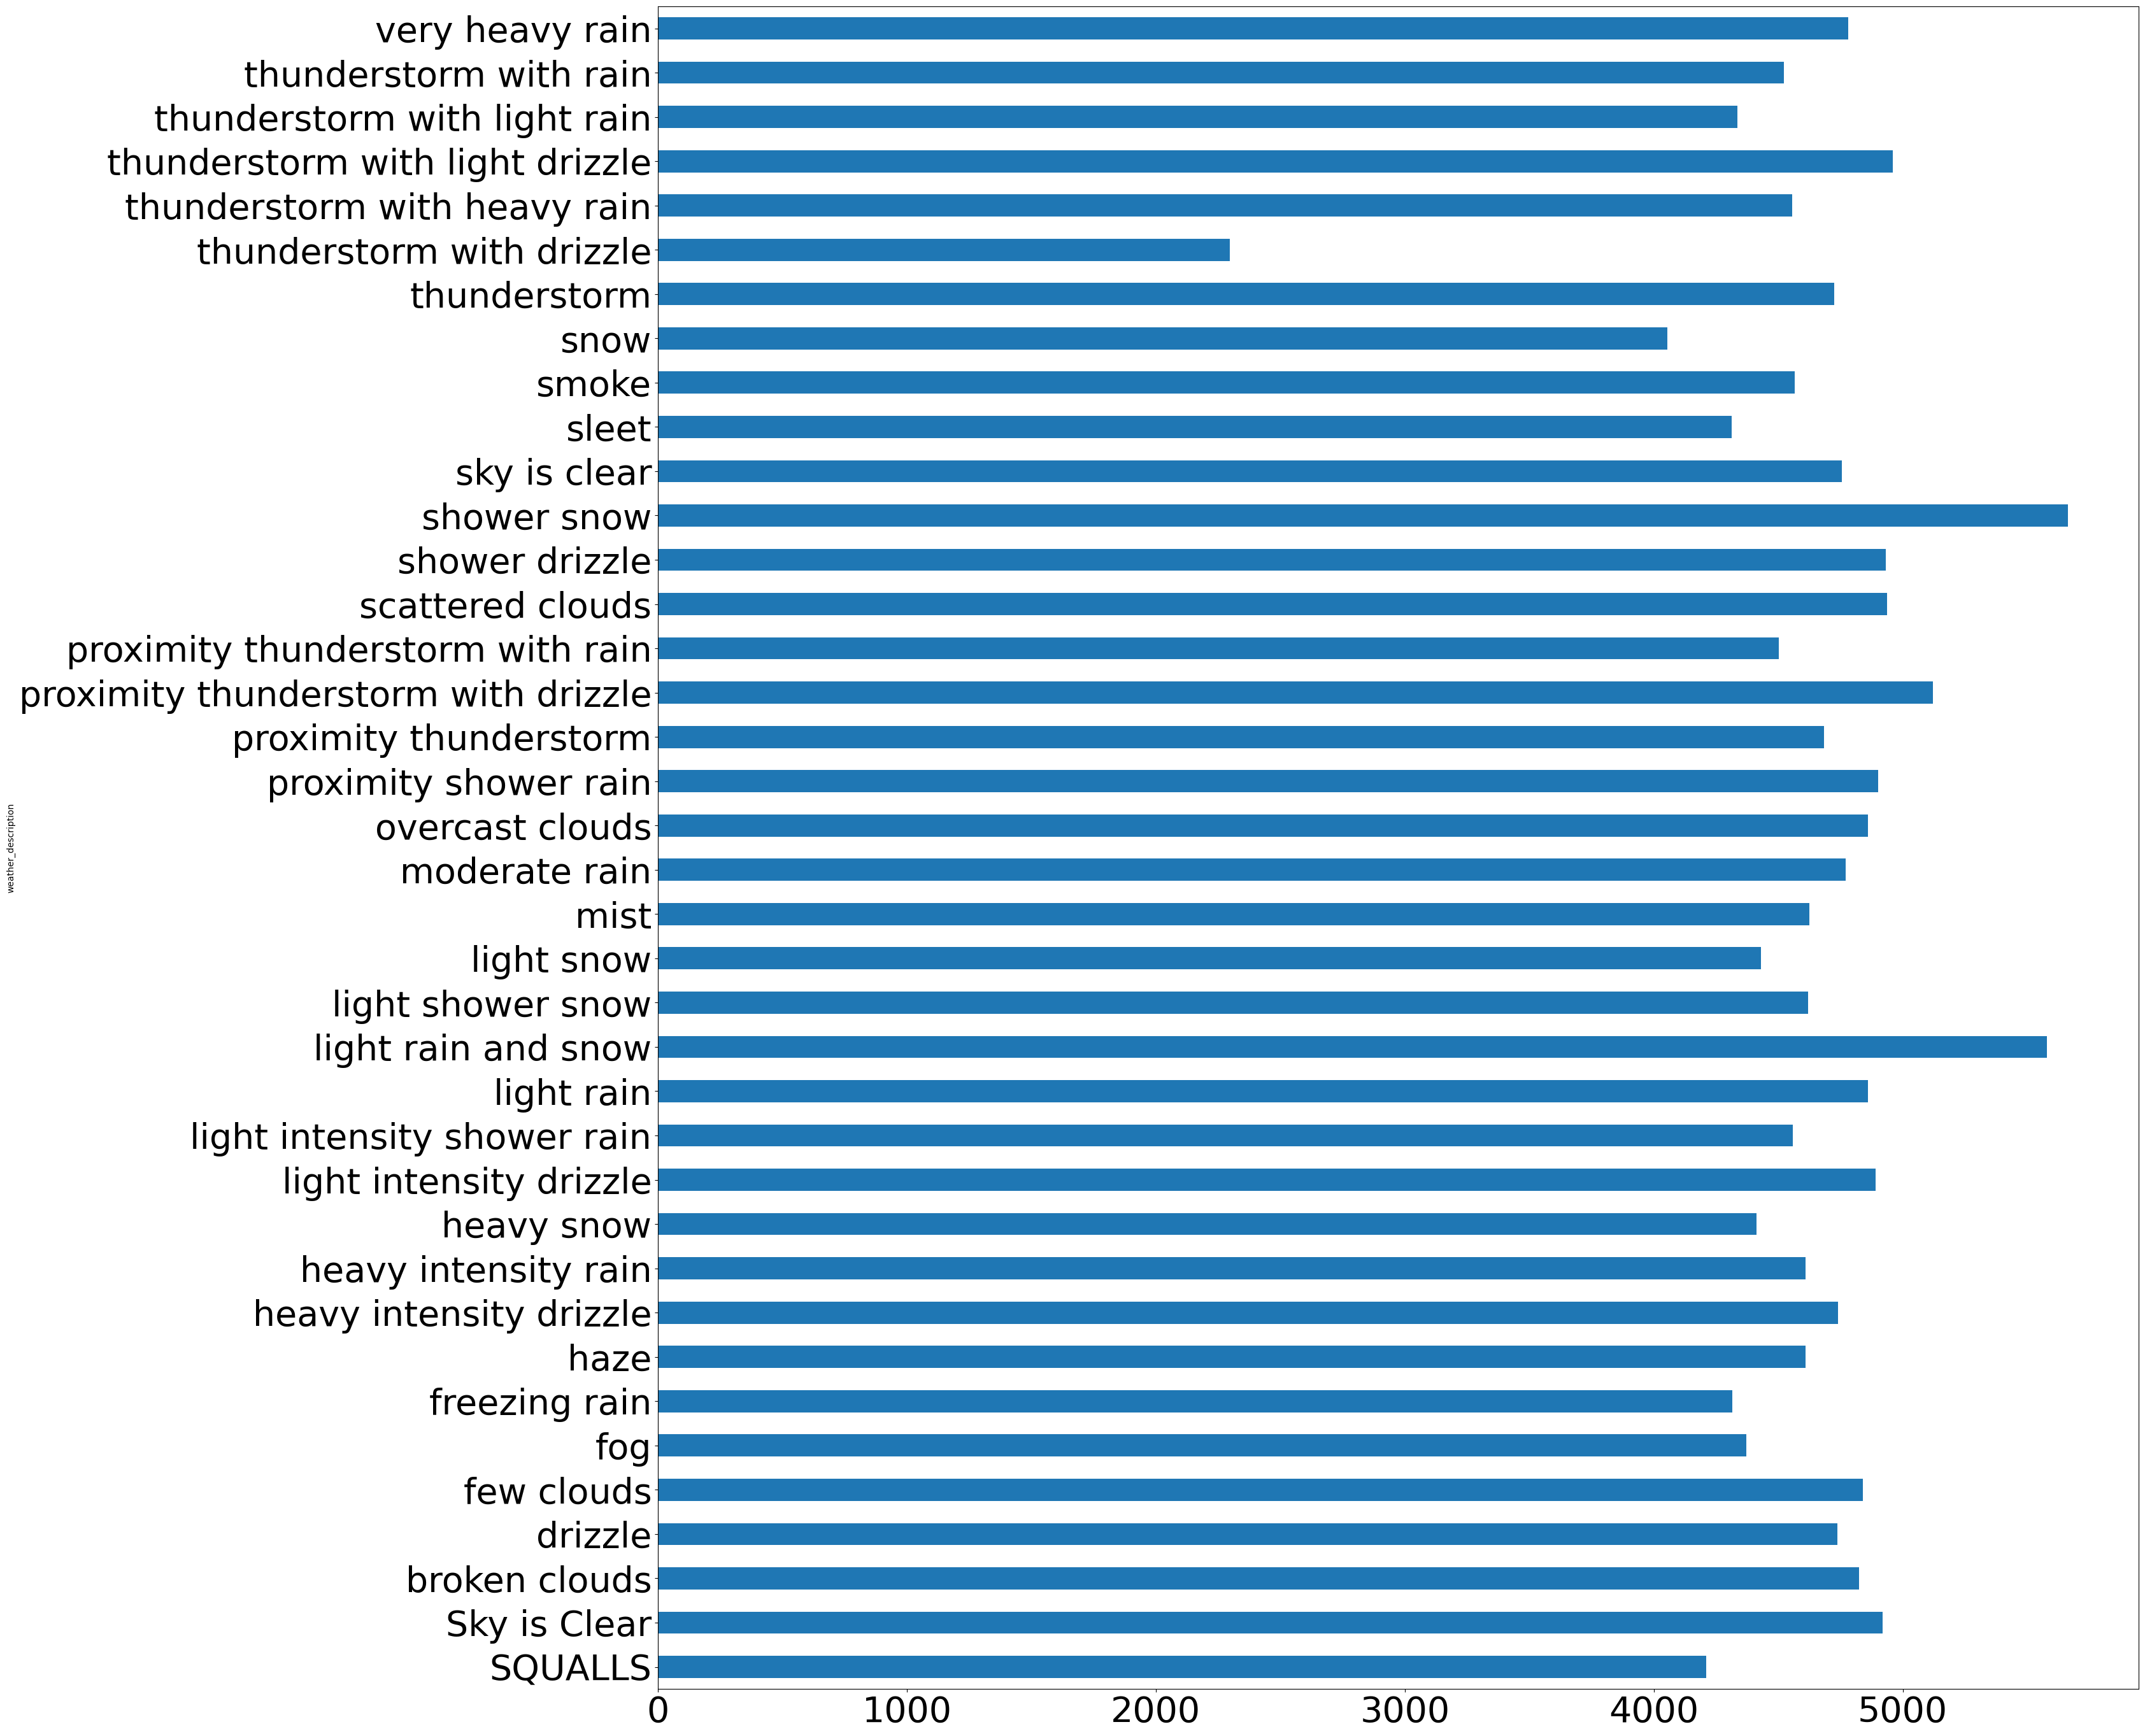

In [27]:
by_weather_description['traffic_volume'].plot.barh(figsize=(30,35),fontsize=40)

There are 3 types of weather that supasses 5000 traffic colume:

- Shower Snow
- Light rain and snow
- Thunderstorm with drizzle

Make some sense why in these weathers there is traffic, people prefer comfort and safety so when these weather occurs people wont expose themselves, another thing is these weathers affect the performance of the car, so being coutios by going slow is the smart thing.

## Conclusions for day traffic indicators

There are 2 main indicators:

Time indicators
- The traffic is usually heavier on warm months.
- The traffic is heavier on workdays.
- On workdays the ruch hours are 7am and 4pm.

Weather indicators

- Shower Snow
- Light rain and snow
- Thunderstorm with drizzle
